In [64]:
import csv
import pickle
import re
from datetime import datetime
import numpy as np
# randn = np.random.randn
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import linregress
from pylab import *
from urllib import urlopen
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from __future__ import division
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn import tree
from sklearn.externals.six import StringIO
import os
from sklearn.externals.six import StringIO  
import pydot
from sklearn.cross_validation import StratifiedKFold


## Variables Pre-processing

### Categorical:

01 - contact: cellular = 1

02 - job: student, retired = 1

03 - marital: single = 1

04 - poutcome (failure, nonexistent, success): success = 1

### Continuous:

05 - age: parabola centered around age 47

06 - campaign (contacts in present campaign): 1 / value

07 - emp.var.rate: 1 - normalized value

08 - euribor3m: 1- normalized value

09 - pdays (days from last campaign contact, or 999): !=999 = 1

10 - previous (number of contacts in previous campaign): !=0 = 1

In [66]:
bank_full = read_csv('bank-additional-full.csv', delimiter=';', header=0)
bank_full.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [67]:
bank = bank_full[['age','job','marital','contact','campaign','pdays','previous','poutcome','emp.var.rate','euribor3m','y']]
#bank = bank_full[['age','job','marital','contact','pdays','previous','poutcome','emp.var.rate','euribor3m','y']]
#bank = bank_full[['age','job','campaign','pdays','poutcome','emp.var.rate','euribor3m','y']]
#bank = bank_full[['age','job','y']]
bank.head(3)

,job,contact,pdays,previous,poutcome,emp.var.rate,euribor3m,y
0,housemaid,telephone,999,0,nonexistent,1.1,4.857,no
1,services,telephone,999,0,nonexistent,1.1,4.857,no
2,services,telephone,999,0,nonexistent,1.1,4.857,no


In [68]:
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [69]:
bank['age'] =((bank['age']-47)/30) ** 2
#bank['age'][bank['age'] < 36] = abs((bank['age']-36)/19)
#bank['age'][bank['age'] >= 36] = 0
#bank['age'][bank['age'] > 58] = abs((bank['age']-58)/19)
bank['age'][bank['age'] > 1] = 1

In [70]:
bank['job'][bank['job'] == 'student'] = 1
bank['job'][bank['job'] == 'retired'] = 1
bank['job'][bank['job'] != 1] = 0

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [71]:
bank['marital'][bank['marital'] == 'single'] = 1
bank['marital'][bank['marital'] != 1] = 0

In [72]:
bank['contact'][bank['contact'] == 'cellular'] = 1
bank['contact'][bank['contact'] != 1] = 0

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [ ]:
bank['campaign'] = 1 / bank['campaign']

In [73]:
bank['pdays'][bank['pdays'] != 999] = 1
bank['pdays'][bank['pdays'] == 999] = 0

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [74]:
bank['previous'][bank['previous'] != 0] = 1
bank['previous'][bank['previous'] != 1] = 0

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [75]:
bank['poutcome'][bank['poutcome'] == 'failure'] = 0
bank['poutcome'][bank['poutcome'] == 'nonexistent'] = 0
bank['poutcome'][bank['poutcome'] == 'success'] = 1

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [76]:
bank['emp.var.rate'] = abs((bank['emp.var.rate'] - 1.4) / 4.8)

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [77]:
bank['euribor3m'] = 1 - (bank['euribor3m'] / 5.5)

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [78]:
bank.head(5)

,job,contact,pdays,previous,poutcome,emp.var.rate,euribor3m,y
0,0,0,0,0,0,0.0625,0.116909,0
1,0,0,0,0,0,0.0625,0.116909,0
2,0,0,0,0,0,0.0625,0.116909,0
3,0,0,0,0,0,0.0625,0.116909,0
4,0,0,0,0,0,0.0625,0.116909,0


In [79]:
byes = bank[bank['y'] == 1]
bno = bank[bank['y'] == 0]

In [80]:
len(byes)

4640

In [81]:
len(bno)

36548

In [128]:
mean(byes)

job             0.152802
contact         0.830388
pdays           0.208405
previous        0.323060
poutcome        0.192672
emp.var.rate    0.548635
euribor3m       0.613975
y               1.000000
dtype: float64

In [84]:
mean(bno)

job             0.051603
contact         0.609910
pdays           0.014994
previous        0.112893
poutcome        0.013106
emp.var.rate    0.239818
euribor3m       0.307002
y               0.000000
dtype: float64

In [129]:
sum(mean(byes))

3.8699380747126648

In [130]:
sum(mean(bno))

1.3493255142262135

In [85]:
X = bank.drop('y', 1)
y = bank['y']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.20, random_state=0)

In [86]:
print X.shape, X_train.shape, X_test.shape

(41188, 7) (32950, 7) (8238, 7)


In [87]:
acc_scores = {}
for n in range(20):
    clf = KNeighborsClassifier(n_neighbors=(n+1)).fit(X_train, y_train)
    y_pred_knn = clf.predict(X_test)
    acc_scores.setdefault((n+1), [])
    acc_scores[(n+1)].append(accuracy_score(y_test, y_pred_knn))

In [88]:
print acc_scores

{1: [0.83636805049769358], 2: [0.87557659626122841], 3: [0.8531196892449624], 4: [0.89718378247147368], 5: [0.89815489196406895], 6: [0.89876183539694099], 7: [0.89584850691915519], 8: [0.89633406166545282], 9: [0.8974265598446225], 10: [0.89645545035202723], 11: [0.89681961641175045], 12: [0.89839766933721776], 13: [0.89900461277008981], 14: [0.89936877882981303], 15: [0.89997572226268507], 16: [0.89791211459092013], 17: [0.89961155620296185], 18: [0.89851905802379217], 19: [0.89839766933721776], 20: [0.89803350327749454]}


In [89]:
nmax = max(acc_scores, key=acc_scores.get)
nmax

15

In [90]:
clf = KNeighborsClassifier(n_neighbors = (nmax))
knn_model = clf.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)
accuracy_score(y_test, y_pred_knn)

0.89997572226268507

In [91]:
X_test = X_test.astype(float)
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)
accuracy_score(y_test, y_pred_log)

0.89864044671036658

In [92]:
clf = GaussianNB()
gnb_model = clf.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
y_proba_gnb = gnb_model.predict_proba(X_test)
accuracy_score(y_test, y_pred_gnb)

0.88310269482884196

In [93]:
clf = SVC(probability=True)
svc_model = clf.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
y_proba_svc = svc_model.predict_proba(X_test)
accuracy_score(y_test, y_pred_svc)

0.8975479485311969

In [94]:
clf = DecisionTreeClassifier()
dtc_model = clf.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)
y_proba_dtc = dtc_model.predict_proba(X_test)
accuracy_score(y_test, y_pred_dtc)

0.89645545035202723

In [95]:
clf = RandomForestClassifier()
rfc_model = clf.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)
y_proba_rfc = rfc_model.predict_proba(X_test)
accuracy_score(y_test, y_pred_rfc)

0.89718378247147368

In [96]:
#clf = tree.DecisionTreeClassifier()
#tdt_model = clf.fit(X_train, y_train)
#y_pred_tdt = tdt_model.predict(X_test)
#y_proba_tdt = tdt_model.predict_proba(X_test)
#accuracy_score(y_test, y_pred_tdt)

In [97]:
#with open("bank.dot", 'w') as f:
#    f = tree.export_graphviz(clf, out_file=f)
#os.unlink('bank.dot')
#dot_data = StringIO() 
#tree.export_graphviz(clf, out_file=dot_data) 
#graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_pdf("bank.pdf")

# GLM ?

In [98]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_knn[:,1])
roc_auc_knn = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_knn, pos_label = None, average = None)

(array([ 0.91672013,  0.60674157]),
 array([ 0.97608963,  0.29379761]),
 array([ 0.9454738 ,  0.39589443]),
 array([7319,  919]))

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


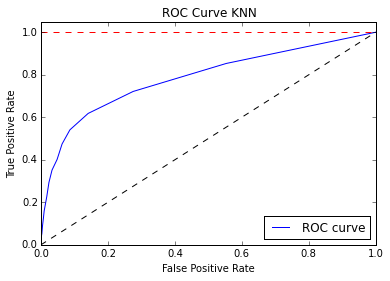

In [99]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc="lower right")
plt.show()

In [100]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_log[:,1])
roc_auc_log = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_log, pos_label = None, average = None)

(array([ 0.90718412,  0.65217391]),
 array([ 0.98688345,  0.19586507]),
 array([ 0.94535698,  0.30125523]),
 array([7319,  919]))

Populating the interactive namespace from numpy and matplotlib


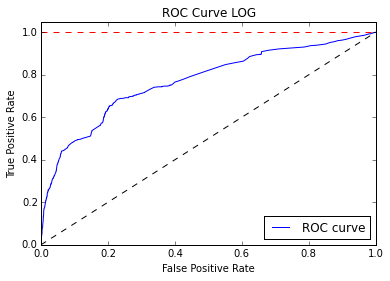

In [101]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_log)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve LOG')
plt.legend(loc="lower right")
plt.show()

In [102]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_gnb[:,1])
roc_auc_gnb = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_gnb, pos_label = None, average = None)

(array([ 0.91926121,  0.46656535]),
 array([ 0.95204263,  0.33405876]),
 array([ 0.93536479,  0.38934686]),
 array([7319,  919]))

Populating the interactive namespace from numpy and matplotlib


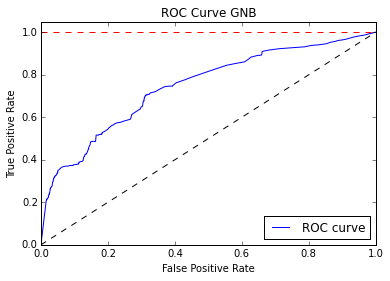

In [103]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve GNB')
plt.legend(loc="lower right")
plt.show()

In [104]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_svc[:,1])
roc_auc_svc = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_svc, pos_label = None, average = None)

(array([ 0.90800252,  0.62376238]),
 array([ 0.9844241 ,  0.20565832]),
 array([ 0.94467025,  0.30932897]),
 array([7319,  919]))

Populating the interactive namespace from numpy and matplotlib


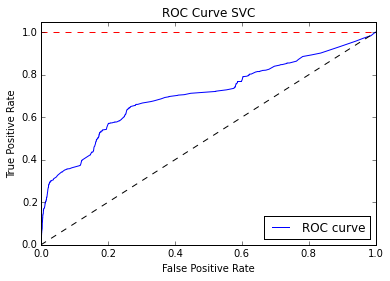

In [105]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_svc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVC')
plt.legend(loc="lower right")
plt.show()

In [106]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_dtc[:,1])
roc_auc_dtc = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_dtc, pos_label = None, average = None)

(array([ 0.91069614,  0.59016393]),
 array([ 0.9795054 ,  0.23503808]),
 array([ 0.94384833,  0.33618677]),
 array([7319,  919]))

Populating the interactive namespace from numpy and matplotlib


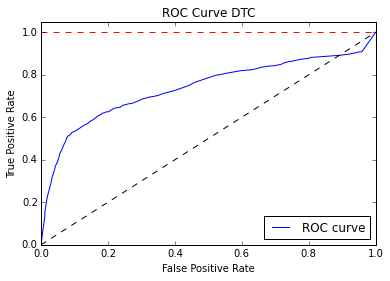

In [107]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_dtc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DTC')
plt.legend(loc="lower right")
plt.show()

In [108]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_rfc[:,1])
roc_auc_rfc = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_rfc, pos_label = None, average = None)

(array([ 0.91317671,  0.58866995]),
 array([ 0.97718268,  0.26006529]),
 array([ 0.9440961 ,  0.36075472]),
 array([7319,  919]))

Populating the interactive namespace from numpy and matplotlib


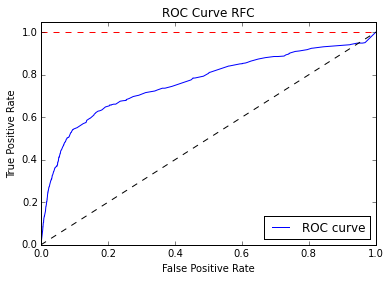

In [109]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RFC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
X = X.astype(float)
cv = StratifiedKFold(y, n_folds=6)

In [ ]:
classifier = LogisticRegression()
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    # Compute ROC curve and area the curve
    probas_ = classifier.fit(X.iloc[train,:], y[train]).predict_proba(X.iloc[test,:])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:,1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [ ]:
accuracy_score(y_test, y_pred_knn)

In [ ]:
accuracy_score(y_test, y_pred_log)

In [ ]:
accuracy_score(y_test, y_pred_gnb)

In [ ]:
accuracy_score(y_test, y_pred_svc)

In [ ]:
accuracy_score(y_test, y_pred_dtc)

In [ ]:
accuracy_score(y_test, y_pred_rfc)

In [110]:
roc_auc_knn

0.78533445750109154

In [111]:
roc_auc_log

0.77003182052882779

In [112]:
roc_auc_gnb

0.74523431716844124

In [113]:
roc_auc_svc

0.70456914427115258

In [114]:
roc_auc_dtc

0.73702971130188522

In [115]:
roc_auc_rfc

0.76444282258482954

In [118]:
px2 = X_test.reshape((-1,10))
#px2 = X_test.reshape((-1,9))
#'age','job','marital','contact','month','pdays','previous','poutcome','emp.var.rate','euribor3m'
#X_err = pd.DataFrame({'job':px2[:,0],'contact':px2[:,1],'pdays':px2[:,2],'previous':px2[:,3],'poutcome':px2[:,4],'emp.var.rate':px2[:,5],'euribor3m':px2[:,6]})
X_err = pd.DataFrame({'age':px2[:,0],'job':px2[:,1],'marital':px2[:,2],'contact':px2[:,3],'campaign':px2[:,4],'pdays':px2[:,5],'previous':px2[:,6],'poutcome':px2[:,7],'emp.var.rate':px2[:,8],'euribor3m':px2[:,9]})

In [119]:
y_err = y_pred_log - y_test

In [120]:
indneg = []
indpos = []
for r in range(len(y_err)):
    if y_err[r] == 1:
        indpos.append(r)
    if y_err[r] == -1:
        indneg.append(r)

print len(indneg), len(indpos)

739 96


In [121]:
X_ones_missed = X_err.iloc[indneg,:]

In [122]:
mean(X_ones_missed)

contact         0.805142
emp.var.rate    0.497857
euribor3m       0.552210
job             0.135318
pdays           0.012179
poutcome        0.000000
previous        0.140731
dtype: float64

In [123]:
mean(byes)

job             0.152802
contact         0.830388
pdays           0.208405
previous        0.323060
poutcome        0.192672
emp.var.rate    0.548635
euribor3m       0.613975
y               1.000000
dtype: float64

In [124]:
X_zeroes_missed = X_err.iloc[indpos,:]

In [125]:
mean(X_zeroes_missed)

contact         0.906250
emp.var.rate    0.756076
euribor3m       0.828513
job             0.229167
pdays           1.000000
poutcome        0.916667
previous        1.000000
dtype: float64

In [126]:
mean(bno)

job             0.051603
contact         0.609910
pdays           0.014994
previous        0.112893
poutcome        0.013106
emp.var.rate    0.239818
euribor3m       0.307002
y               0.000000
dtype: float64